<a href="https://colab.research.google.com/github/nishat09/VGG-16-VIA-SCREENING/blob/main/Image_Classification_Using_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

In [ ]:
!unzip "VIA.zip"

# Load positive samples
os.chdir('/content/Positive')
X_pos = []
y_pos = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    X_pos.append(img)
    y_pos.append(1)  # Assuming positive class is represented by 1

# Load negative samples
os.chdir('/content/Negative')
X_neg = []
y_neg = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))
    X_neg.append(img)
    y_neg.append(0)  # Assuming negative class is represented by 0

# Ensure equal number of samples for positive and negative classes
min_samples = min(len(X_pos), len(X_neg))
X = X_pos[:min_samples] + X_neg[:min_samples]
y = y_pos[:min_samples] + y_neg[:min_samples]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Label Encoding
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Convert labels to one-hot encoding
num_classes = len(set(y_train))  # Assuming all classes are present in y_train
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Convert lists to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Print shapes
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)

unzip:  cannot find or open VIA.zip, VIA.zip.zip or VIA.zip.ZIP.


  0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

X_train Shape: (243, 224, 224, 3)
X_test Shape: (121, 224, 224, 3)
y_train Shape: (243, 2)
y_test Shape: (121, 2)


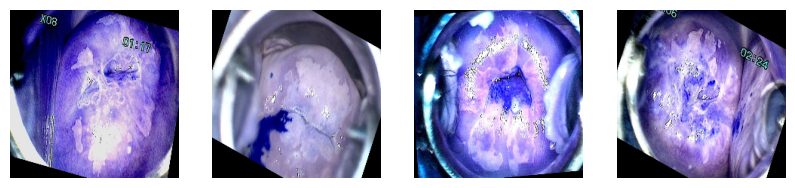

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model, num_classes):
      top_model = bottom_model.output
      top_model = GlobalAveragePooling2D()(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(1024,activation='relu')(top_model)
      top_model = Dense(512,activation='relu')(top_model)
      top_model = Dense(num_classes,activation='softmax')(top_model)
      return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1, initial_epoch=0)




Epoch 1/5
8/8 [==============================] - 233s 30s/step - loss: 0.2740 - accuracy: 0.9177 - val_loss: 0.5840 - val_accuracy: 0.7686
Epoch 2/5
8/8 [==============================] - 233s 30s/step - loss: 0.1989 - accuracy: 0.9218 - val_loss: 0.5316 - val_accuracy: 0.8182
Epoch 3/5
8/8 [==============================] - 231s 30s/step - loss: 0.1163 - accuracy: 0.9753 - val_loss: 0.5970 - val_accuracy: 0.7769
Epoch 4/5
8/8 [==============================] - 232s 30s/step - loss: 0.0607 - accuracy: 0.9918 - val_loss: 0.6271 - val_accuracy: 0.8182
Epoch 5/5
8/8 [==============================] - 233s 30s/step - loss: 0.0325 - accuracy: 0.9959 - val_loss: 0.6624 - val_accuracy: 0.7934


In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

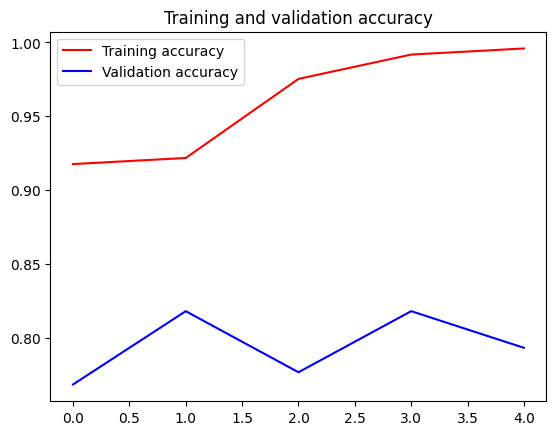

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "/content/Negative/AAK1_rotated_0.jpg"  # Replace "path_to_your_image.jpg" with the actual path to your image
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is not None:
    # Resize the image to match the expected input shape of your model
    resized_image = cv2.resize(image, (224, 224))

    # Preprocess the image (if necessary)
    # You may need to apply further preprocessing based on how your model was trained

    # Make predictions
    prediction = model.predict(np.expand_dims(resized_image, axis=0))

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Print the predicted class
    print("Predicted Class:", predicted_class)
else:
    print("Failed to load the image. Please check the image path.")


1/1 [==============================] - 2s 2s/step
Predicted Class: 0
